# Convolution Neural Network

CNN'i bir hatırlayalım:

CNN bir image'i detect etmek için kullandığımız yapay sinir ağı algortimasıdır. Daha öncelerde Mnist dataset içinden rakamların labellarını tahmin etmeye çalışmıştık. Şimdi adımlarımzı tekrarlayalım. 

1. İlk olarak bir inputumuz var. Ve bu input bir image. Bilindiği üzrere imageler matrislerden meydana geliyor. 

2. Bir convolution layer yapısı meydana getiriyoruz. Bu layer'ın görevi ne? İmage'lerden bir feature map çıkarmasını bekliyoruz. Elimizde belirli filtreler var ve bu filtreler bu convolution neural network'un inputunda dolaşıyor. Bu filtreleri image üzerinde kaydırarak "featureMap" elde ediyor. Bu adımda aktivasyon fonksiyonu olarak ReLu kullanıyoruz ve Relu non-linearity arttırıyor. Yani karmaşıklığı artırıyor. 

3. Ardından max_pooling yapıyoruz ve bu işlem sonunda "pooling_layer" elde ediyoruz. İstersek bir convolution layer daha yapabiliriz. İstersek de yapmayabiliriz. Bu aslında problemin büyüklüğüne de bağlı bir parametredir. Bu işlemlerde çokça hyperparametre vardır ve bunların denenmesi ve başarının artması beklenebilir.

4. Ardından Drop_out işlemi var. Bu kullanılacak node'ların bir kısmının devre dışı bırakılmasıyla iligi bir işlemdir. Bu da aslında "overfitting" önüne geçmek için önceden aldığımız yöntemlerden biridir.

5. Ardından fully_connected layer ile tüm bu layerları birbirine bağlarız ardından flatten yapıyoruz. Elde ettiğimiz matrisi bie vektör haline getirmek işlemi ve bu flatten'ı output için bir fonksiyona sokup output elde ediyoruz.(Softmax)

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

#Data'yı yükleyebilmek için:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

#Görselleştirme için:
import matplotlib.pyplot as plt

#Kaç tane class olduğunu öğrenmek için:
from glob import glob

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_path = "C:/Desktop/fruits-360_dataset/fruits-360/Training/"
test_path = "C:/Desktop/fruits-360_dataset/fruits-360/Test/"


load_img, img_to_array bu iki fonksiyon tensorFlow'un içinde (tensorflow.keras.preprocessing.image)

Burada load_img fonksiyonunu kullanarak train_path'imizin içinde bulunanan herhangi bir image yolunu kopyalayıp matplotlib ile ekrana çizdirdik.

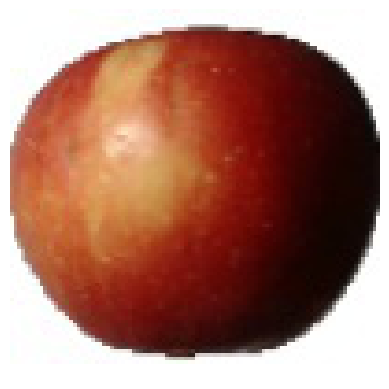

In [3]:
img = load_img(train_path + "Apple Braeburn/0_100.jpg")
plt.imshow(img)
plt.axis("off") #eksenlerin görünmesi engellenmiştir.
plt.show()

Ardından img_to_array fonksiyonu ile img değişkenimizi bir array'e çeviriyoruz. bunu bir array'e çeivrmek bizim işlemlerimizden ilki ardından bir de shape ile image'in boyutlarına bakıyoruz. Bilindiği üzere renkli image'ler 3 farklı kanaldan oluşuyor. RGB bu sebeple bir boyutumuz 3, diğer boyutlarımız ise en ve boy yani x ve y değrlerimizdir.

In [4]:
x= img_to_array(img)
print(x.shape)

(100, 100, 3)


Sınıf etiket sayısını öğrenmek:glob fonksiyonu, belirli bir klasördeki tüm dosya yollarını elde etmek için kullanılır. 

className'leri görebilmek için glob() fonksiyonunu kullanıyoruz. İçinde * ibaresi kaç farklı adet sınıf adı gördüyse o kadar saymasını istediğimiz için ekliyoruz. 

Ardından numberOfClass değişkenine clasName'in len parametresini eşitliyoruz.

In [5]:
#Kaç adet sınıfın olduğunu öğrenmek için glob() fonksiyonunu kullanacağız

className= glob(train_path+ "/*")
numberOfClass= len(className)
numberOfClass

131

Genel bir bakış attık verisetimizi tanıdık neler olup bittiğini kaç adet class label olduğunu da anladık. Şimdi CNN kurmaya başlayalım.

Layer'ları oluştururken yardım aldığımız yapı Sequential() sınıfıdır. Bu yapı sıralıdır ve önceden belirlediğimiz adımları tek tek işleyeceğiz.

Sıralı CNN kurabilmek için önce Sequential modelimizi çağırıyoruz ardından ilk katmanımızın özelliklerini yazıyoruz.

model.add(Conv2D(32,(3,3), input_shape= x.shape))

32 adet filtre kullanılmasını istediğimiz ve input_Shape'imizi belirliyoruz. Daha sonra aktivasyon fonksiyonumuzu belirtip her bir layer ardından "MaxPooling" işlemi yapıyoruz.

Ardından ikinci katmanımız daha sonra aynı adımları üçüncü katman için geçerli hale getiriyoruz.

Daha sonra elimizdeki matrisi düzleştirme işlemini yapıyoruz. (Flatten)

Ardından Dense layer ile fullyconnected bir yapı oluşturmak için layer'ları biririnine bağlıyoruz. Bu katman her bir önceki tüm katmanlardaki nöronlarla bağlıdır. Bu sayede her bir nöron önceki katmandaki tüm özellikleri ve özellikler üzerinde öğrenme işlemini gerçekleştirir. on olarak, softmax aktivasyon fonksiyonu kullanılarak, tüm sınıfların olasılıkları normalize edilir ve sınıflandırma sonuçları elde edilir.

Dense katmanındaki nöron sayısı bizim modelimizin kapasitesini etkiler. Overfitting'i engelleyebilmek için de bir Dropout işlemi uyguluyoruz.

In [ ]:
model= Sequential()
model.add(Conv2D(32,(3,3), input_shape= x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())


model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64),(3,3))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass))
model.add(Activation("softmax"))

Aşağıdaki üç paramtre modelimizin derlenmesinde kullanılacak metrikleri belirlediğimiz parametreleridir.

1. Loss fonksiyonu==> Bu parametre, modelin (kayıp) fonksiyonunu belirler. Kayıp fonsiyonumuz modelin tahminlerinin gerçek değerlerden ne kadar uzak olduğunu bize gösteren bir değerdir. Bu değerin optimize edilmesi modelimizin performansını yükseltir.Categorical_crossentropy kayıp fonksiyonu çok sınıflı sınıflandırma problemleri için kullanılan bir fonksiyonudr.

2. Optimizer seçimimiz; Optimizasyon algoritmamızın belirlernmesi için kullandığımız adımdır. Burada optimizer kaybın minimize edilmesi için kullanılan "rmsprop" fonksiyonu büyük verisetlerini için iyi sonuç veren bir algoritmadır.

3. Metrics: Bizim modelimizin başarısını olçtüğümz değer şimdiye kadar olduğun gibi yine "accuracy" yani doğruluk değerini kullanmış olduk.

In [ ]:
model.compile(loss="categorical_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

In [ ]:
batch_size=32

Elimizdeki veri setinde her bir class'da yalnızca 400 adet resim var. Eğitim için yeterli olmayacaktır. Bizim elimizdeki resimlerden "Data Augmention" diğer bir deyişle "Image Data Generator" ya da diğer bir deyişle bu resimleri çoklamamız lazımdır.  Daha fazla resimler elde edeceğiz. Bunun için neler yapılabilir: 


ImageDataGenerator sınıfını kullanacağız. Bu sınıfı keras'dan import ettik ve şimdi de her bir resime farklı farklı uygulamalar yapıp elimizdeki verileri arttıracağız.

yalnızca train edeceiğimiz datanın üzerinde oynadık çünkü test edeceğimiz datanın orijinal olması bizim için daha önemlidir.

Yaptığımız işlemleri açıklamak gerekirse öncesinde normalize işlemi yaptık ve piksel değerlerini 0-1 arasında normalize ettik ardından sher_range rastgele verilen ölçüde image'leri sağa sola yatık bir şekilde kaydetmesini istedik ardından horizontal_flip=True, ile resimlerimiz yine rastgele 90 derece açılarda kaydedilecek ardından zoom_range ile verilen ölçüde resimlerimizin zoom halinde kaydetmiş oldu. Bu şekilde elimizde zaten var olan resimlerin farklı şekillerde kaydedilmesi sağlayıp verilerin artmasını sağladık.


Train_data_gen'i normalize ettiğimiz için test verilerini de normalize ettik. test_data_gen için de bu test verilerimizi de resclae ile normalize işlemine tabii tuttuk. 


Resimlere yapılacak işlemleri tanımladık fakat bunun uygulanması için bir yol belirtmeliyiz. flow_from_directory ile train path'imizi belirttik ki bu dosyalar içinde gezinsin ve kaydetsin. target_size'ımızdan kanal sayımızı çıkarıp yalnızca resimlerimizin boyutlarını giriyoruz ardından color_mode'umuzun da "rgb" yani üç kanallı olduğunu belirttikten sonra son olarak class_mode'umuzun kategrik verilerin analiz edilmesi özelliğini koyacağız.



In [ ]:
train_data_gen= ImageDataGenerator(rescale=1./255,
                  shear_range=0.3,
                  horizontal_flip=True,
                  zoom_range=0.3,
                  )

test_data_gen=  ImageDataGenerator(rescale=1./255)

train_generator = train.data_gen.flow_from_directory(train_path, 
                                        target_size= x.shape[:2],
                                        batch_size=batch_size,
                                        color_mode="rgb",
                                        class_mode= "categorical")


test_generator = test.data_gen.flow_from_directory(test_path, 
                                        target_size= x.shape[:2],
                                        batch_size=batch_size,
                                        color_mode="rgb",
                                        class_mode= "categorical")
                                                    

Artık modelimizi fit etme zamanı geldi. "Fit" demek ne demek modelimizi train etme işlemiminin başlamasıdır. Fit etmek istediğimiz generator= train_generator, ardından steps_per_epoch=1600//batch_size, ile bir epoch'da yapılması gereken batch sayıdır. batch sayısı da bir epochda veriyi kaç kez train edeceğimiz işlemidir. 1600//32 den 50 bulunur. 

epochs=10 adım sayısını belirledik, validation_data= doğrulama testimizin test_generator olduğunu belirttik ardından validation_steps= 00//batch_size olarak ayarladık.

In [ ]:
hist = model.fit_generator(
                    generator=train_generator,  #fit etmek istenilen generator, train_generator'dur.
                    steps_per_epoch=1600//batch_size,
                    epochs=100,
                    validation_data=test_generator,
                    validation_steps = 800//batch_size
                    )

In [ ]:
#model save

model.save_weights("deneme.h5")